Cleaning Time Series Data : Time Series Talk

 https://www.youtube.com/watch?v=7_Js8h709Dw

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import functions as main

# Read the Data

In [2]:
opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\df_weekly.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.astype(float)

In [3]:
opencsv = opencsv.asfreq(pd.infer_freq(opencsv.index))

In [4]:
opencsv

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,JPY_EUR,SPY,QQQ,EXSA,...,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses,BTC_PageViews,Crypto_PageViews,BTC_Supply
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-30,0.0627,2.442132e+02,NaN,NaN,1.303900,0.011569,0.008870,84.992340,40.332348,18.262423,...,19.209999,115.489998,17.580000,68.869255,55.121548,325.0,374.0,NaN,NaN,3.561700e+06
2010-08-06,0.0623,3.521612e+02,NaN,8585.3,1.318131,0.011651,0.008840,86.626381,41.168751,18.516254,...,19.184999,117.839996,18.070000,68.830765,55.399757,359.0,422.0,NaN,NaN,3.637650e+06
2010-08-13,0.0645,3.521612e+02,NaN,8626.1,1.282989,0.011618,0.009060,83.481644,39.372696,18.290625,...,19.305000,118.739998,17.740000,70.336624,55.541592,516.0,609.0,NaN,NaN,3.707650e+06
2010-08-20,0.0655,5.117735e+02,NaN,8631.6,1.280803,0.011717,0.009150,82.880470,39.548763,18.001530,...,19.195000,119.970001,17.590000,72.915215,55.690178,423.0,458.0,NaN,NaN,3.768900e+06
2010-08-27,0.0650,6.233870e+02,NaN,8579.8,1.270648,0.011856,0.009330,82.364067,38.800415,17.973328,...,19.049999,121.010002,18.700001,72.440773,55.636154,294.0,323.0,NaN,NaN,3.839400e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,60324.3000,8.367526e+13,8.362849e+09,20905.5,1.070847,0.006223,0.005808,544.219971,479.109985,50.869999,...,95.190002,215.009995,26.570000,91.185036,71.610153,593984.0,562499.0,3687.0,17.0,1.971838e+07
2024-07-05,56646.2400,8.008248e+13,1.707263e+10,20947.5,1.079331,0.006187,0.005730,554.640015,496.160004,51.410000,...,95.334999,220.929993,28.480000,92.252472,72.179413,490537.0,510689.0,4547.0,28.0,1.972142e+07
2024-07-12,57913.6800,7.949520e+13,7.362339e+09,NaN,1.087276,0.006321,0.005814,559.989990,494.820007,52.160000,...,96.339996,223.110001,28.120001,93.627892,72.757645,658355.0,486027.0,4441.0,29.0,1.972469e+07


**A VAR training model workflow**

![image info](./VAR_Training_Model_Worflow.png)

source: https://www.ikigailabs.io/multivariate-time-series-forecasting-in-python-settings/vector-autoregression-python

# ADF test

In [6]:
# Individual Test

from statsmodels.tsa.stattools import adfuller

# If p-value is not less than .05, we reject the null hypothesis. This means the time series is stationary.

# H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

# HA: The time series is stationary.

#perform augmented Dickey-Fuller test
adfuller(opencsv.BTC_USD)

(0.17467712137684316,
 0.9708050065963536,
 16,
 714,
 {'1%': -3.4395418285955563,
  '5%': -2.865596454500293,
  '10%': -2.5689301318958955},
 12738.987091683279)

In [7]:
# Data Frame Test

from statsmodels.tsa.stattools import adfuller

# Dictionary to store the p-values
p_values = {}
stationary = []
non_stationary = []

# Loop through each column in the DataFrame
for column in opencsv.columns:
    # Perform ADF test
    result = adfuller(opencsv[column].dropna())  # Drop NA values if any
    p_values[column] = result[1]  # Store the p-value (result[1] is the p-value)

    if p_values[column] < 0.05:
       stationary.append(column)
    else:
        non_stationary.append(column) 

In [8]:
p_values

{'BTC_USD': 0.9708050065963536,
 'Mining_Difficulty': 1.0,
 'USD_OnChain_Volume': 0.7084242625199072,
 'M2_Liquidity': 0.8934649836522045,
 'EUR_USD': 0.4583753729057509,
 'JPY_USD': 0.8694952395919189,
 'JPY_EUR': 0.0,
 'SPY': 0.9941782907046707,
 'QQQ': 0.995612645456534,
 'EXSA': 0.9271523947821221,
 'JPXN': 0.7672465265279917,
 'IWDA': 0.9957573709247572,
 'GLD': 0.8902397750782358,
 'SLV': 0.28404060660039665,
 'TLT': 0.3810438826770546,
 'BND': 0.47978486424027267,
 'Nr_Transactions': 0.9180455838704737,
 'Nr_Addresses': 0.5619342065814182,
 'BTC_PageViews': 8.812064972736989e-05,
 'Crypto_PageViews': 0.014076228973073434,
 'BTC_Supply': 9.116734228480277e-06}

In [9]:
stationary

['JPY_EUR', 'BTC_PageViews', 'Crypto_PageViews', 'BTC_Supply']

In [38]:
stationary_df = opencsv.copy()
stationary_df = stationary_df.drop(columns=[col for col in stationary_df.columns if col not in stationary])
stationary_df = stationary_df.loc[stationary_df.index[1]:]
stationary_df

,JPY_EUR,BTC_PageViews,Crypto_PageViews,BTC_Supply
Date,,,,
2010-08-06,0.008840,NaN,NaN,3.637650e+06
2010-08-13,0.009060,NaN,NaN,3.707650e+06
2010-08-20,0.009150,NaN,NaN,3.768900e+06
2010-08-27,0.009330,NaN,NaN,3.839400e+06
2010-09-03,0.009250,NaN,NaN,3.896500e+06
...,...,...,...,...
2024-06-28,0.005808,3687.0,17.0,1.971838e+07
2024-07-05,0.005730,4547.0,28.0,1.972142e+07
2024-07-12,0.005814,4441.0,29.0,1.972469e+07


In [10]:
non_stationary

['BTC_USD',
 'Mining_Difficulty',
 'USD_OnChain_Volume',
 'M2_Liquidity',
 'EUR_USD',
 'JPY_USD',
 'SPY',
 'QQQ',
 'EXSA',
 'JPXN',
 'IWDA',
 'GLD',
 'SLV',
 'TLT',
 'BND',
 'Nr_Transactions',
 'Nr_Addresses']

In [11]:
modify_df = opencsv.copy()
modify_df.drop(columns=stationary, inplace=True)
modify_df

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010-07-30,0.0627,2.442132e+02,NaN,NaN,1.303900,0.011569,84.992340,40.332348,18.262423,32.519962,19.209999,115.489998,17.580000,68.869255,55.121548,325.0,374.0
2010-08-06,0.0623,3.521612e+02,NaN,8585.3,1.318131,0.011651,86.626381,41.168751,18.516254,33.171909,19.184999,117.839996,18.070000,68.830765,55.399757,359.0,422.0
2010-08-13,0.0645,3.521612e+02,NaN,8626.1,1.282989,0.011618,83.481644,39.372696,18.290625,31.976667,19.305000,118.739998,17.740000,70.336624,55.541592,516.0,609.0
2010-08-20,0.0655,5.117735e+02,NaN,8631.6,1.280803,0.011717,82.880470,39.548763,18.001530,32.240543,19.195000,119.970001,17.590000,72.915215,55.690178,423.0,458.0
2010-08-27,0.0650,6.233870e+02,NaN,8579.8,1.270648,0.011856,82.364067,38.800415,17.973328,32.007717,19.049999,121.010002,18.700001,72.440773,55.636154,294.0,323.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,60324.3000,8.367526e+13,8.362849e+09,20905.5,1.070847,0.006223,544.219971,479.109985,50.869999,72.309998,95.190002,215.009995,26.570000,91.185036,71.610153,593984.0,562499.0
2024-07-05,56646.2400,8.008248e+13,1.707263e+10,20947.5,1.079331,0.006187,554.640015,496.160004,51.410000,74.080002,95.334999,220.929993,28.480000,92.252472,72.179413,490537.0,510689.0
2024-07-12,57913.6800,7.949520e+13,7.362339e+09,NaN,1.087276,0.006321,559.989990,494.820007,52.160000,75.629997,96.339996,223.110001,28.120001,93.627892,72.757645,658355.0,486027.0


<Axes: xlabel='Date'>

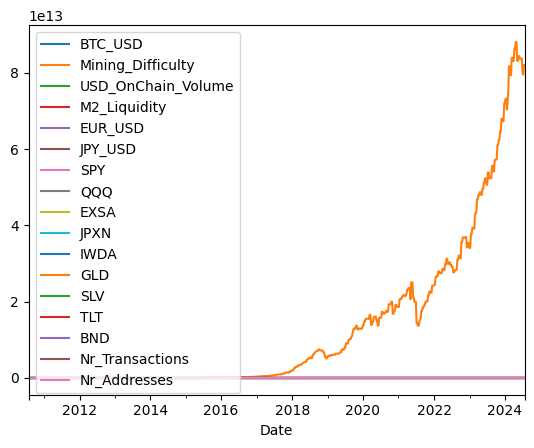

In [12]:
modify_df.plot.line()

# Normalize

In [13]:
normalized_df = modify_df.copy()
avgs = normalized_df.mean()
devs = normalized_df.std()

In [14]:
for column in normalized_df.columns:
    normalized_df[column] = (normalized_df[column] - avgs.loc[column]) / devs.loc[column]

In [15]:
normalized_df

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010-07-30,-0.682839,-0.624173,NaN,NaN,1.027607,1.291800,-1.328407,-1.145317,-1.414593,-1.488775,-1.344785,-1.088154,-0.518652,-1.647232,-1.810919,-1.422945,-1.474215
2010-08-06,-0.682839,-0.624173,NaN,-1.410001,1.154038,1.340496,-1.315023,-1.138238,-1.386078,-1.433176,-1.346023,-1.002008,-0.439536,-1.649144,-1.768664,-1.422714,-1.474042
2010-08-13,-0.682839,-0.624173,NaN,-1.400463,0.841826,1.321080,-1.340781,-1.153440,-1.411425,-1.535109,-1.340079,-0.969016,-0.492818,-1.574359,-1.747122,-1.421645,-1.473366
2010-08-20,-0.682839,-0.624173,NaN,-1.399177,0.822408,1.380229,-1.345705,-1.151950,-1.443900,-1.512605,-1.345528,-0.923927,-0.517037,-1.446300,-1.724554,-1.422278,-1.473912
2010-08-27,-0.682839,-0.624173,NaN,-1.411287,0.732185,1.462751,-1.349935,-1.158284,-1.447068,-1.532461,-1.352710,-0.885802,-0.337816,-1.469862,-1.732760,-1.423156,-1.474400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,2.703174,3.415696,2.476662,1.470187,-1.042909,-1.889882,2.432973,2.568650,2.248398,1.904627,2.418753,2.560042,0.932875,-0.538977,0.693389,2.618539,0.556487
2024-07-05,2.496724,3.242235,5.764694,1.480006,-0.967539,-1.911288,2.518320,2.712968,2.309059,2.055578,2.425935,2.777057,1.241264,-0.485966,0.779848,1.914297,0.369321
2024-07-12,2.567866,3.213881,2.098960,NaN,-0.896954,-1.831674,2.562140,2.701625,2.393311,2.187766,2.475716,2.856972,1.183139,-0.417659,0.867671,3.056761,0.280228


<Axes: xlabel='Date'>

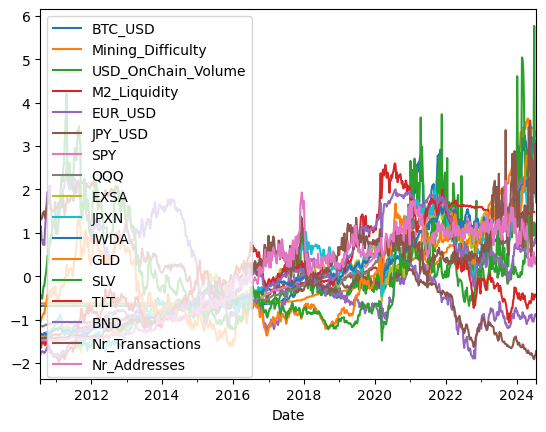

In [16]:
normalized_df.plot.line()

# Take First Difference to Remove Trend

In [17]:
differenced_df = normalized_df.copy()
differenced_df = differenced_df.diff()

In [18]:
differenced_df = differenced_df.loc[differenced_df.index[1]:]
differenced_df

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010-08-06,-2.245209e-08,5.211831e-12,NaN,NaN,0.126431,0.048696,0.013384,0.007080,0.028514,0.055600,-0.001238,0.086146,0.079115,-0.001912,0.042255,0.000231,0.000173
2010-08-13,1.234865e-07,0.000000e+00,NaN,0.009538,-0.312212,-0.019416,-0.025757,-0.015202,-0.025346,-0.101933,0.005944,0.032992,-0.053282,0.074785,0.021542,0.001069,0.000676
2010-08-20,5.613023e-08,7.706169e-12,NaN,0.001286,-0.019417,0.059149,-0.004924,0.001490,-0.032476,0.022504,-0.005449,0.045089,-0.024219,0.128059,0.022567,-0.000633,-0.000545
2010-08-27,-2.806512e-08,5.388689e-12,NaN,-0.012110,-0.090223,0.082521,-0.004230,-0.006334,-0.003168,-0.019856,-0.007182,0.038124,0.179221,-0.023562,-0.008205,-0.000878,-0.000488
2010-09-03,-2.329405e-07,0.000000e+00,NaN,0.001449,0.106132,0.008041,0.025441,0.014457,0.070496,0.054276,0.026253,0.031159,0.116251,-0.049922,-0.006724,0.000170,0.000181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,-2.130165e-01,0.000000e+00,0.952489,-0.021437,0.001833,-0.040927,-0.002376,-0.002607,-0.033701,0.180799,0.021795,0.008431,-0.066199,-0.107562,-0.070947,0.007768,0.172828
2024-07-05,-2.064504e-01,-1.734608e-01,3.288032,0.009819,0.075370,-0.021407,0.085347,0.144317,0.060661,0.150951,0.007182,0.217015,0.308389,0.053011,0.086460,-0.704242,-0.187166
2024-07-12,7.114170e-02,-2.835418e-02,-3.665734,NaN,0.070584,0.079615,0.043820,-0.011342,0.084252,0.132188,0.049781,0.079915,-0.058125,0.068307,0.087822,1.142464,-0.089093


<Axes: xlabel='Date'>

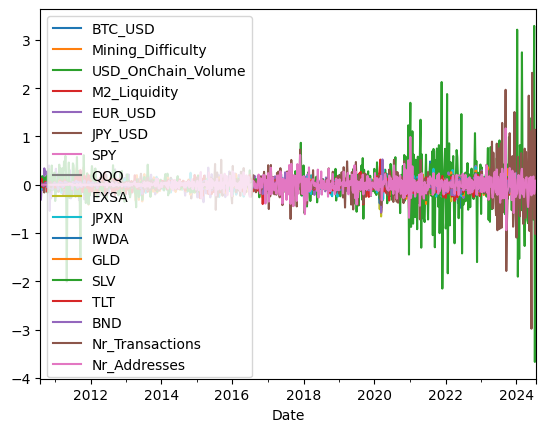

In [19]:
differenced_df.plot.line()

# Remove Increasing Volatility

In [20]:
annual_volatility = differenced_df.groupby(differenced_df.index.year).std()
annual_volatility

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010,0.000002,5.152626e-11,0.000003,0.009684,0.226963,0.079273,0.012911,0.007481,0.030839,0.054257,0.012773,0.084824,0.147183,0.060396,0.038700,0.018653,0.000768
2011,0.000135,5.339087e-09,0.001145,0.012619,0.188587,0.102254,0.023734,0.013697,0.060950,0.083848,0.025005,0.174467,0.444108,0.093530,0.041924,0.006436,0.009303
2012,0.000040,5.065285e-09,0.000521,0.014888,0.122498,0.078809,0.014749,0.009537,0.038401,0.055126,0.016557,0.115285,0.164569,0.094297,0.034194,0.054138,0.017716
2013,0.005939,2.597432e-06,0.023260,0.014270,0.119488,0.089772,0.014781,0.008851,0.040416,0.075732,0.020533,0.132407,0.141400,0.077649,0.049105,0.062743,0.042748
2014,0.005662,5.783573e-05,0.047222,0.012540,0.075704,0.063528,0.020552,0.012575,0.056462,0.076680,0.028725,0.083682,0.085978,0.063812,0.033452,0.045505,0.055118
2015,0.001346,1.225502e-04,0.010990,0.014265,0.148339,0.049652,0.027024,0.021345,0.080875,0.075102,0.045971,0.082300,0.079109,0.103901,0.051041,0.160845,0.120667
2016,0.002290,3.631809e-04,0.018604,0.013771,0.108477,0.098678,0.024659,0.018971,0.073721,0.084874,0.041265,0.098664,0.096078,0.100687,0.052211,0.154407,0.133947
2017,0.059792,3.256742e-03,0.163704,0.015392,0.094132,0.055183,0.013170,0.014747,0.038479,0.045047,0.022645,0.069044,0.069940,0.068072,0.036692,0.269077,0.234902
2018,0.056808,1.284535e-02,0.177470,0.016279,0.096898,0.048758,0.050612,0.040837,0.067006,0.110185,0.046792,0.052043,0.043661,0.064889,0.037629,0.135263,0.184179


In [21]:
vol_reduced_df = pd.DataFrame(index=differenced_df.index)

for column in differenced_df.columns:
    # Map each date to its corresponding annual volatility
    annual_vol_map = differenced_df.index.map(lambda d: annual_volatility.loc[d.year, column])
    
    # Divide the differenced data by the annual volatility
    vol_reduced_df[column] = differenced_df[column] / annual_vol_map

In [25]:
vol_reduced_df

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010-08-06,-0.013653,1.011490e-01,NaN,NaN,0.557057,0.614283,1.036661,0.946312,0.924610,1.024748,-0.096948,1.015583,0.537529,-0.031650,1.091842,0.012409,0.225847
2010-08-13,0.075093,0.000000e+00,NaN,0.984904,-1.375609,-0.244927,-1.995071,-2.032069,-0.821881,-1.878714,0.465362,0.388948,-0.362010,1.238237,0.556633,0.057299,0.879861
2010-08-20,0.034133,1.495581e-01,NaN,0.132769,-0.085553,0.746145,-0.381394,0.199204,-1.053060,0.414767,-0.426581,0.531562,-0.164549,2.120321,0.583131,-0.033941,-0.710476
2010-08-27,-0.017067,1.045814e-01,NaN,-1.250441,-0.397524,1.040972,-0.327614,-0.846687,-0.102729,-0.365963,-0.562310,0.449450,1.217670,-0.390123,-0.212018,-0.047080,-0.635193
2010-09-03,-0.141653,0.000000e+00,NaN,0.149667,0.467617,0.101436,1.970594,1.932474,2.285899,1.000344,2.055336,0.367338,0.789839,-0.826583,-0.173752,0.009124,0.235257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,-0.951279,0.000000e+00,0.672532,-0.941080,0.028090,-0.858027,-0.041456,-0.029384,-0.434624,1.514940,0.374158,0.058341,-0.388233,-1.346144,-0.911663,0.007908,0.905742
2024-07-05,-0.921957,-1.601990e+00,2.321607,0.431029,1.154825,-0.448788,1.489366,1.626529,0.782326,1.264838,0.123299,1.501676,1.808596,0.663441,1.110994,-0.716987,-0.980885
2024-07-12,0.317701,-2.618638e-01,-2.588295,NaN,1.081493,1.669121,0.764687,-0.127832,1.086563,1.107621,0.854604,0.552984,-0.340886,0.854862,1.128504,1.163140,-0.466909


<Axes: xlabel='Date'>

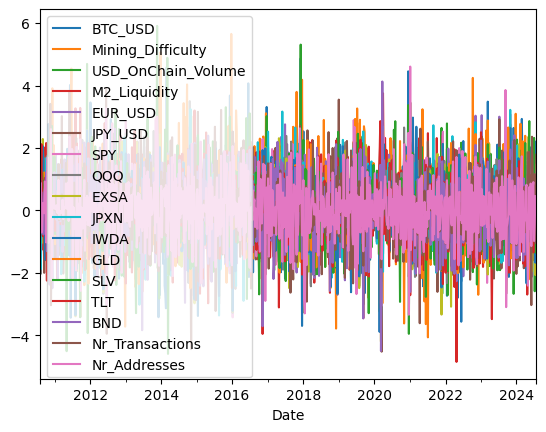

In [26]:
vol_reduced_df.plot.line()

# Remove Seasonality

In [27]:
month_avgs = vol_reduced_df.groupby(vol_reduced_df.index.month).mean()
month_avgs

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
1,-0.057754,0.330852,0.018715,-0.297930,-0.048118,0.052346,0.205566,0.237527,0.187192,0.153250,0.201518,0.281271,0.184244,0.048633,0.166129,-0.042456,0.018778
2,0.052657,0.373403,-0.031572,0.228597,-0.012877,-0.119302,0.298529,0.216271,0.133308,0.146930,0.228399,0.068998,0.022403,-0.154119,-0.109642,0.083234,0.067390
3,0.075679,0.175830,0.002944,0.541273,-0.085019,-0.124828,0.161785,0.138520,0.098578,0.057168,0.146934,0.066639,-0.051311,0.069939,0.038818,-0.062958,0.012166
4,0.059096,0.248075,-0.025555,0.158965,0.055557,-0.160989,0.165342,0.147149,0.240701,-0.070784,0.116306,0.106748,-0.005006,0.000963,0.160539,0.190631,0.131581
5,0.020911,0.229038,0.092274,-0.038012,-0.133375,-0.070204,0.083111,0.137694,0.106514,-0.022394,0.077799,-0.145093,-0.114639,0.020479,0.139920,-0.058451,-0.078898
6,0.169792,0.287239,-0.012037,0.220459,0.042600,-0.043444,0.152827,0.126315,-0.182748,0.142402,0.059121,-0.037222,-0.112416,0.063598,0.092435,0.097909,0.135177
7,0.136221,0.161306,-0.073888,0.205700,0.009085,0.195018,0.392743,0.439708,0.239903,0.130967,0.295643,0.139333,0.140726,0.188093,0.350208,-0.036935,-0.042722
8,-0.105459,0.497677,0.018530,0.300319,-0.069795,0.059141,-0.152722,-0.031207,-0.207409,-0.220315,-0.118415,0.209615,0.085287,0.180592,0.169947,0.047745,0.015953
9,-0.044673,0.626633,-0.001237,0.138474,-0.148601,-0.216221,0.060095,0.070582,0.076735,0.208992,0.084489,-0.233123,-0.213164,-0.178693,-0.128687,-0.001677,0.062312


In [28]:
unseasoned_df = pd.DataFrame(index=vol_reduced_df.index)

for column in vol_reduced_df.columns:
    # Map each date to its corresponding monthly average
    monthly_avg = vol_reduced_df.index.map(lambda d: month_avgs.loc[d.month, column])
    
    # Divide the differenced data by the annual volatility
    unseasoned_df[column] = vol_reduced_df[column] - monthly_avg

In [29]:
unseasoned_df

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010-08-06,0.091806,-0.396528,NaN,NaN,0.626852,0.555142,1.189383,0.977519,1.132019,1.245063,0.021466,0.805968,0.452243,-0.212242,0.921896,-0.035336,0.209894
2010-08-13,0.180553,-0.497677,NaN,0.684585,-1.305815,-0.304068,-1.842348,-2.000862,-0.614472,-1.658399,0.583776,0.179333,-0.447296,1.057645,0.386686,0.009554,0.863908
2010-08-20,0.139593,-0.348118,NaN,-0.167550,-0.015759,0.687004,-0.228672,0.230411,-0.845651,0.635082,-0.308166,0.321947,-0.249836,1.939729,0.413185,-0.081686,-0.726428
2010-08-27,0.088393,-0.393095,NaN,-1.550760,-0.327729,0.981831,-0.174892,-0.815479,0.104680,-0.145648,-0.443895,0.239835,1.132383,-0.570715,-0.381964,-0.094825,-0.651146
2010-09-03,-0.096980,-0.626633,NaN,0.011193,0.616218,0.317657,1.910499,1.861892,2.209164,0.791352,1.970847,0.600461,1.003002,-0.647889,-0.045065,0.010801,0.172945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,-1.121071,-0.287239,0.684568,-1.161539,-0.014510,-0.814584,-0.194283,-0.155699,-0.251876,1.372539,0.315037,0.095563,-0.275816,-1.409742,-1.004097,-0.090000,0.770566
2024-07-05,-1.058178,-1.763296,2.395495,0.225329,1.145740,-0.643805,1.096623,1.186821,0.542424,1.133871,-0.172345,1.362343,1.667870,0.475349,0.760786,-0.680053,-0.938163
2024-07-12,0.181480,-0.423170,-2.514406,NaN,1.072408,1.474103,0.371944,-0.567541,0.846660,0.976653,0.558961,0.413652,-0.481612,0.666769,0.778297,1.200075,-0.424187


<Axes: xlabel='Date'>

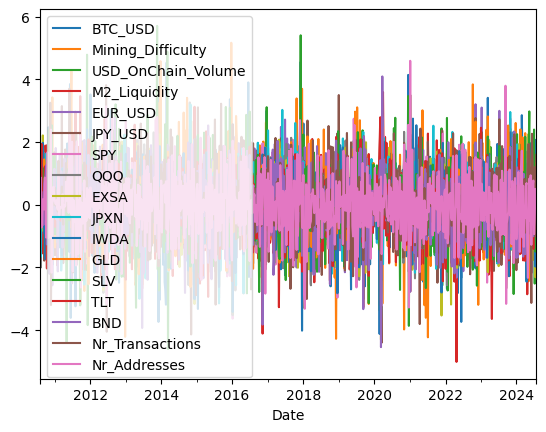

In [30]:
unseasoned_df.plot.line()

In [34]:
# Data Frame Test

from statsmodels.tsa.stattools import adfuller

# Dictionary to store the p-values
p_values = {}

# Loop through each column in the DataFrame
for column in unseasoned_df.columns:
    # Perform ADF test
    result = adfuller(unseasoned_df[column].dropna())  # Drop NA values if any
    p_values[column] = result[1]  # Store the p-value (result[1] is the p-value)

    if p_values[column] < 0.05:
       pass
    else:
        print(f"Non-Stationary: {column}")

In [35]:
p_values

{'BTC_USD': 0.0,
 'Mining_Difficulty': 1.9868947210375838e-10,
 'USD_OnChain_Volume': 1.1517367199163605e-28,
 'M2_Liquidity': 0.00144403815041591,
 'EUR_USD': 0.0,
 'JPY_USD': 0.0,
 'SPY': 0.0,
 'QQQ': 0.0,
 'EXSA': 0.0,
 'JPXN': 0.0,
 'IWDA': 1.565550332520835e-29,
 'GLD': 1.1186101302860602e-29,
 'SLV': 2.097838459614423e-29,
 'TLT': 2.5630959406441433e-23,
 'BND': 0.0,
 'Nr_Transactions': 1.7123258740132427e-29,
 'Nr_Addresses': 0.0}

In [39]:
full_clean_df = pd.merge(stationary_df, unseasoned_df, left_index=True, right_index=True, how='outer')

In [43]:
full_clean_df.head(20)

,JPY_EUR,BTC_PageViews,Crypto_PageViews,BTC_Supply,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,...,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-06,0.00884,NaN,NaN,3637650.0,0.091806,-0.396528,NaN,NaN,0.626852,0.555142,...,0.977519,1.132019,1.245063,0.021466,0.805968,0.452243,-0.212242,0.921896,-0.035336,0.209894
2010-08-13,0.00906,NaN,NaN,3707650.0,0.180553,-0.497677,NaN,0.684585,-1.305815,-0.304068,...,-2.000862,-0.614472,-1.658399,0.583776,0.179333,-0.447296,1.057645,0.386686,0.009554,0.863908
2010-08-20,0.00915,NaN,NaN,3768900.0,0.139593,-0.348118,NaN,-0.167550,-0.015759,0.687004,...,0.230411,-0.845651,0.635082,-0.308166,0.321947,-0.249836,1.939729,0.413185,-0.081686,-0.726428
2010-08-27,0.00933,NaN,NaN,3839400.0,0.088393,-0.393095,NaN,-1.550760,-0.327729,0.981831,...,-0.815479,0.104680,-0.145648,-0.443895,0.239835,1.132383,-0.570715,-0.381964,-0.094825,-0.651146
2010-09-03,0.00925,NaN,NaN,3896500.0,-0.096980,-0.626633,NaN,0.011193,0.616218,0.317657,...,1.861892,2.209164,0.791352,1.970847,0.600461,1.003002,-0.647889,-0.045065,0.010801,0.172945
2010-09-10,0.00938,NaN,NaN,3953550.0,0.077100,-0.542773,-0.136211,1.891683,-0.371415,0.556011,...,0.517125,1.079103,0.437568,1.447318,0.176943,0.213164,-0.535845,-0.642194,0.016640,0.036496
2010-09-17,0.00890,NaN,NaN,4018900.0,-0.013353,-0.626633,0.536831,0.165687,1.647454,-1.782481,...,1.425957,-0.487714,-0.477363,-0.898870,1.447501,1.167554,-0.189912,0.660228,0.002042,-0.151709
2010-09-24,0.00888,NaN,NaN,4091750.0,0.116353,-0.434597,-0.464717,-1.021991,1.100313,1.600948,...,1.596857,0.180123,0.620555,-0.918257,1.162275,1.003002,1.216473,0.819848,0.052771,0.864600
2010-10-01,0.00878,NaN,NaN,4157600.0,-0.305818,-0.031652,-0.031471,-1.292264,1.175236,1.122996,...,-0.888022,-1.286292,-0.048845,-1.740545,0.829027,0.607803,1.068270,0.923815,-0.011015,0.448084


In [41]:
full_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2010-08-06 to 2024-07-26
Freq: W-FRI
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   JPY_EUR             730 non-null    float64
 1   BTC_PageViews       474 non-null    float64
 2   Crypto_PageViews    474 non-null    float64
 3   BTC_Supply          730 non-null    float64
 4   BTC_USD             730 non-null    float64
 5   Mining_Difficulty   730 non-null    float64
 6   USD_OnChain_Volume  722 non-null    float64
 7   M2_Liquidity        726 non-null    float64
 8   EUR_USD             730 non-null    float64
 9   JPY_USD             730 non-null    float64
 10  SPY                 730 non-null    float64
 11  QQQ                 730 non-null    float64
 12  EXSA                730 non-null    float64
 13  JPXN                730 non-null    float64
 14  IWDA                730 non-null    float64
 15  GLD                 730 no

In [42]:
full_clean_df.isnull().sum()

JPY_EUR                 0
BTC_PageViews         256
Crypto_PageViews      256
BTC_Supply              0
BTC_USD                 0
Mining_Difficulty       0
USD_OnChain_Volume      8
M2_Liquidity            4
EUR_USD                 0
JPY_USD                 0
SPY                     0
QQQ                     0
EXSA                    0
JPXN                    0
IWDA                    0
GLD                     0
SLV                     0
TLT                     0
BND                     0
Nr_Transactions         0
Nr_Addresses            0
dtype: int64

In [46]:
full_clean_df.to_csv("full_clean_df.csv", date_format='%Y-%m-%d')